<h2>READ FILES<h2>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import torch
from tqdm import tqdm

In [ ]:
temperature_data_path = '../data/temperature/'
height_data_path = '../data/height/'

temperature_files = os.listdir(temperature_data_path)
height_files = os.listdir(height_data_path)

In [ ]:
temperature_data = []
height_data = []

for temperature_file in tqdm(temperature_files):
    file_path = temperature_data_path + temperature_file
    data = pd.read_csv(file_path)
    temperature_data.append(data)
    
for height_file in tqdm(height_files):
    file_path = height_data_path + height_file
    data = pd.read_csv(file_path)
    height_data.append(data)

In [ ]:
temperature_tensor = torch.tensor(np.array(temperature_data))
height_tensor = torch.tensor(np.array(height_data))
torch.save(temperature_tensor, 'temperature_tensor.pt')
torch.save(height_tensor, 'height_tensor.pt')

<h2>Remove Outliers<h2>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import torch
from tqdm import tqdm

In [ ]:
temperature_data_path = '../data/temperature/'
height_data_path = '../data/height/'

temperature_files = os.listdir(temperature_data_path)
height_files = os.listdir(height_data_path)

print(len(temperature_files))
print(len(height_files))

In [ ]:
temperature_data = []
height_data = []

omit = [490, 706, 760, 1572, 1776]

count = 1
for temperature_file in tqdm(temperature_files):
    if(count not in omit):
        file_path = temperature_data_path + temperature_file
        data = pd.read_csv(file_path)
        temperature_data.append(data)
    count += 1
    
count = 1
for height_file in tqdm(height_files):
    if(count not in omit):
        file_path = height_data_path + height_file
        data = pd.read_csv(file_path)
        height_data.append(data)
    count += 1

In [ ]:
temperature_tensor = torch.tensor(np.array(temperature_data))
height_tensor = torch.tensor(np.array(height_data))
torch.save(temperature_tensor, 'temperature_tensor_v1.pt')
torch.save(height_tensor, 'height_tensor_v1.pt')

In [ ]:
print(len(temperature_data))
print(len(height_data))

<h2>READ TENSORS<h2>

In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import nn
import itertools
import torch.nn.functional as F

from tensorflow import keras
import random
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

In [2]:
# temperature_tensor = torch.load('temperature_tensor.pt')
# height_tensor = torch.load('height_tensor.pt')

temperature_tensor = torch.load('temperature_tensor_v1.pt')
height_tensor = torch.load('height_tensor_v1.pt')

In [3]:
print(len(height_tensor))

1959


<h2>Visualizations<h2>

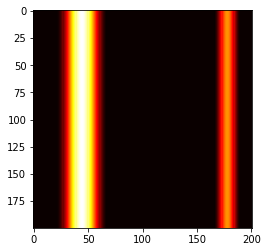

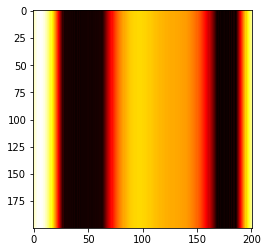

In [4]:
plt.imshow(temperature_tensor[0], cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(height_tensor[0], cmap='hot', interpolation='nearest')
plt.show()

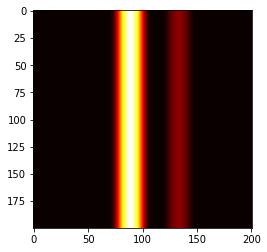

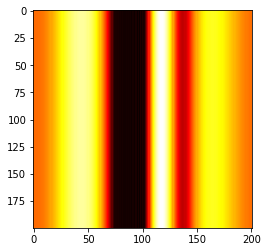

In [5]:
plt.imshow(temperature_tensor[50], cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(height_tensor[50], cmap='hot', interpolation='nearest')
plt.show()

<h2>Data Characteristics<h2>

In [ ]:
plt.plot(temperature_tensor[0][0], label='temperature')
plt.plot(height_tensor[0][0], label='height')
plt.legend()
plt.show()

In [ ]:
plt.plot(temperature_tensor[50][0], label='temperature')
plt.plot(height_tensor[50][0], label='height')
plt.legend()
plt.show()

In [ ]:
plt.plot(temperature_tensor[500][0], label='temperature')
plt.plot(height_tensor[500][0], label='height')
plt.legend()
plt.show()

In [ ]:
temperatures = []
heights = []
for tensor in temperature_tensor:
    temperatures.append(mean(tensor[0].tolist()))
for tensor in height_tensor:
    if(mean(tensor[0].tolist())>200):
        for i in tensor[0]:
            if(i>200):
                print(i)
    heights.append(mean(tensor[0].tolist()))

plt.plot(temperatures)
plt.show()
plt.plot(heights)
plt.show()

In [ ]:
for i in range (len(heights)):
    if(heights[i]>200):
        print(heights[i])
        print(i)

<h2>Data<h2>

In [ ]:
temperatures = temperature_tensor.numpy()
heights = height_tensor.numpy()

t = []
for temperature in temperatures:
    t.append([temperature[0]])
t = np.array(t)
t_tensor = torch.from_numpy(t).float()
    
h = []
for height in heights:
    h.append([height[0]])
h = np.array(h)
h_tensor = torch.from_numpy(h).float()

In [ ]:
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(t, h, test_size=0.1, random_state=seed)

<h2>CNN<h2>

In [ ]:
num_epochs = 20
learning_rate = 0.001

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.ReLU())
        # self.layer2 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        # self.layer3 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        # out = self.layer2(out)
        # out = self.layer3(out)
        out = self.layer4(out)
        return out  

In [ ]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# print(t_tensor[:480].squeeze())
print(t_tensor.squeeze())

In [ ]:
losses = []

for epoch in tqdm(range(num_epochs)):
    # outputs = model(t_tensor[:480])
    # loss = criterion(outputs, h_tensor[:480])
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    #Backprop and perform Adam optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

In [ ]:
print(losses)

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
h_orig = np.tile(h[0], (200, 1))
h_pred = np.tile(output_1[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>MLP<h2>

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        # self.layer2 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        # self.layer3 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        # out = self.layer2(out)
        # out = self.layer3(out)
        out = self.layer4(out)
        return out  

In [ ]:
model = MLP() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(t_tensor.squeeze())

In [ ]:
losses = []

#DATA NORMALIZATION AFTER OUTLIER REMOVAL

for epoch in tqdm(range(num_epochs)):
    # outputs = model(t_tensor[:480])
    # loss = criterion(outputs, h_tensor[:480])
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    #Backprop and perform Adam optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>Data Normalization<h2>

In [4]:
normalized_temperatures = temperature_tensor.numpy()
normalized_heights = height_tensor.numpy()

normalized_t = []
for temperature in normalized_temperatures:
    norm = [float(i)/sum(temperature[0]) for i in temperature[0]]
    normalized_t.append([norm])
normalized_t = np.array(normalized_t)
normalized_t_tensor = torch.from_numpy(normalized_t).float()
    
normalized_h = []
for height in normalized_heights:
    norm = [float(i)/sum(height[0]) for i in height[0]]
    normalized_h.append([norm])
normalized_h = np.array(normalized_h)
normalized_h_tensor = torch.from_numpy(normalized_h).float()

3.210414043518338e-16
0.9999999937002089


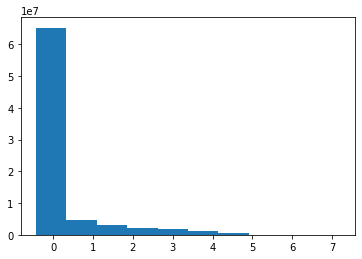

In [8]:
data = normalized_h_tensor.numpy()

plt.hist(data.flatten())
print(data.mean())
print(data.std())

In [27]:
t_mean = temperature_tensor.mean()
t_std = temperature_tensor.std()

normalized_t_tensor = ((temperature_tensor - t_mean)/t_std)[:,0:1,:].float()

h_mean = temperature_tensor.mean()
h_std = temperature_tensor.std()

normalized_h_tensor = ((temperature_tensor - t_mean)/t_std)[:,0:1,:].float()


<h4>CNN<h4>

In [28]:
num_epochs = 20
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [29]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
print(normalized_t_tensor.squeeze())

tensor([[-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        ...,
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333],
        [-0.4333, -0.4333, -0.4333,  ..., -0.4333, -0.4333, -0.4333]])


In [31]:
print(normalized_h_tensor.shape)

torch.Size([1959, 1, 201])


In [32]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(normalized_t_tensor)
    loss = criterion(outputs, normalized_h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  5%|████▏                                                                              | 1/20 [00:03<01:14,  3.93s/it]

1.0019022


 10%|████████▎                                                                          | 2/20 [00:04<00:37,  2.10s/it]

0.98068213


 15%|████████████▍                                                                      | 3/20 [00:05<00:25,  1.52s/it]

0.88123405


 20%|████████████████▌                                                                  | 4/20 [00:06<00:20,  1.25s/it]

0.73481005


 25%|████████████████████▊                                                              | 5/20 [00:07<00:16,  1.11s/it]

0.5800675


 30%|████████████████████████▉                                                          | 6/20 [00:08<00:14,  1.02s/it]

0.4450161


 35%|█████████████████████████████                                                      | 7/20 [00:08<00:12,  1.03it/s]

0.33749956


 40%|█████████████████████████████████▏                                                 | 8/20 [00:09<00:11,  1.08it/s]

0.26121473


 45%|█████████████████████████████████████▎                                             | 9/20 [00:10<00:09,  1.14it/s]

0.21688998


 50%|█████████████████████████████████████████                                         | 10/20 [00:11<00:08,  1.14it/s]

0.20183758


 55%|█████████████████████████████████████████████                                     | 11/20 [00:12<00:07,  1.20it/s]

0.20927463


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:12<00:06,  1.25it/s]

0.22882135


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:13<00:05,  1.29it/s]

0.2491413


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:14<00:04,  1.32it/s]

0.26151842


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:15<00:03,  1.34it/s]

0.26200095


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:15<00:02,  1.34it/s]

0.25111312


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:16<00:02,  1.28it/s]

0.2321929


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:17<00:01,  1.32it/s]

0.20963086


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:18<00:00,  1.35it/s]

0.18757382


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]

0.1691638


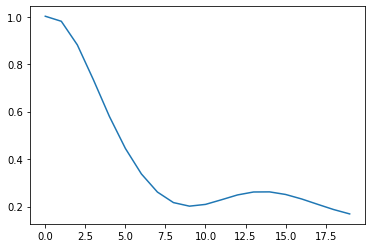

In [33]:
plt.plot(losses)
plt.show()

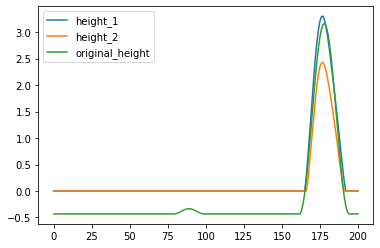

In [34]:
temp = 200

output_1 = model(normalized_t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(normalized_t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')

h = normalized_h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

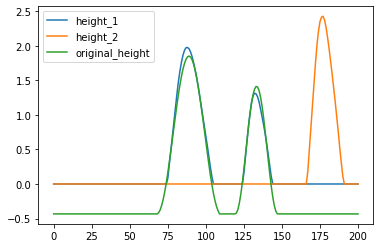

In [35]:
temp = 400

output_1 = model(normalized_t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(normalized_t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = normalized_h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

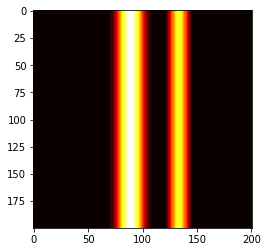

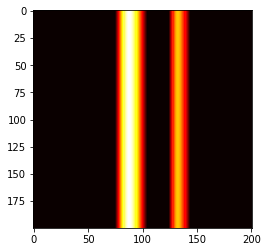

In [36]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h4>MLP<h4>

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [ ]:
model = MLP() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(normalized_t_tensor.squeeze())

In [ ]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(normalized_t_tensor)
    loss = criterion(outputs, normalized_h_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
temp = 200

output_1 = model(normalized_t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(normalized_t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')

h = normalized_h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
temp = 400

output_1 = model(normalized_t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')

h = normalized_h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>Deeper and Wider Network<h2>

In [ ]:
num_epochs = 20
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=7, stride=1, padding=5),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv1d(60, 70, kernel_size=5, stride=1, padding=12),
            nn.ReLU())
        self.layer3 = nn.Sequential(
            nn.Conv1d(70, 80, kernel_size=11, stride=1, padding=1),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(80, 70, kernel_size=11, stride=1, padding=1),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv1d(70, 60, kernel_size=11, stride=1, padding=1),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        return out  

In [ ]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(normalized_t_tensor.squeeze())

In [ ]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h4>MLP<h4>

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer3 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        return out  

In [ ]:
model = MLP() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(t_tensor.squeeze())

In [ ]:
losses = []
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h2>Single Cell Convolutions<h2>

In [ ]:
num_epochs = 20
learning_rate = 0.001

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=1, stride=1),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv1d(60, 60, kernel_size=1, stride=1),
            nn.ReLU())
        self.layer3 = nn.Sequential(
            nn.Conv1d(60, 60, kernel_size=1, stride=1),
            nn.ReLU())
        # self.layer4 = nn.Sequential(
        #     nn.Conv1d(80, 70, kernel_size=1, stride=1, padding=1),
        #     nn.ReLU())
        # self.layer5 = nn.Sequential(
        #     nn.Conv1d(70, 60, kernel_size=1, stride=1, padding=1),
        #     nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=1, stride=1),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        # out = self.layer4(out)
        # out = self.layer5(out)
        out = self.layer6(out)
        return out  

In [ ]:
model = ConvNet() 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(normalized_t_tensor.squeeze())

In [ ]:
losses = []
num_epochs = 20

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

In [ ]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
'''
ConvNet, Linear DONE
Remove outliers DONE
Data normalization DONE 
Deeper and Wider nets DONE
Conv - Single cell convs (kernel size 1) DONE
Activation functions DONE
Changing Loss Functions DONE
Try overfitting single sample
'''